# **All Time NBA and MLB Players by State (U.S.)**

**OBJECTIVE**: Analyze the number of all time players for both NBA and MLB by the State where they were born.

## Data Description

##### NBA
Kaggle dataset: https://www.kaggle.com/datasets/drgilermo/nba-players-stats?datasetId=1358&select=Players.csv (Players.csv)

**Number of Instances**: 3922

**Number of Attributes**: 7 features, 4 text columns and 3 numerical attributes

**Attribute Information**:
* Player: player's full name (first and last)
* height: height in cm
* weight: weight in Kg
* collage: college attended by the player
* born: birthdate of the player
* birth_city: city where the player was born
* birth_state: state where the player was born 

##### MLB
Kaggle dataset: https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball (players.csv)

**Number of Instances**: 20358

**Number of Attributes**: 24 features

**Main Attributes Information**:
* birth_year: birth year of the player
* birth_country: country where the player was born
* birth_state: state where the player was born
* birth_city: city where the player was born
* death_year: death year of the player
* death_country: country where the player died
* death_state: state where the player died
* death_city: city where the player died 
...

##### Population
Wikipedia table: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population (table-1)

**Number of Instances**: 61

**Number of Attributes**: 16 columns

**Main Attributes Information**:
* State or territory: State name
* Census population: census population by State (different columns for different census years)

#### Imports

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

We also want to consider the region were a player was born. The dictionary regions link each State with its region, while the second dictionary give us an abbreviated form of each State name (needed to link the NBA and MLB data).

In [2]:
regions = {'CT' : 'Northeast', 'ME' : 'Northeast', 'MA' : 'Northeast', 'NH' : 'Northeast', 'RI' : 'Northeast', 'VT' : 'Northeast', 'NJ' : 'Northeast', 'NY' : 'Northeast', 'DE' : 'Northeast', 'PA' : 'Northeast','IL' : 'Midwest', 'IN' : 'Midwest', 'MI' : 'Midwest', 'OH' : 'Midwest', 'WI' : 'Midwest', 'IA' : 'Midwest', 'KS' : 'Midwest', 'MN' : 'Midwest', 'MO' : 'Midwest', 'NE' : 'Midwest', 'ND' : 'Midwest', 'SD' : 'Midwest','FL' : 'South', 'GA' : 'South', 'MD' : 'South', 'NC' : 'South', 'SC' : 'South', 'VA' : 'South', 'WA' : 'South', 'WV' : 'South', 'AL' : 'South', 'KY' : 'South', 'MS' : 'South', 'TN' : 'South', 'AR' : 'South','LA' : 'South', 'OK' : 'South', 'TX' : 'South','AZ' : 'West', 'CO' : 'West', 'ID' : 'West', 'MT' : 'West', 'NV' : 'West', 'NM' : 'West', 'UT' : 'West', 'WY' : 'West', 'AK' : 'West', 'CA' : 'West', 'HI' : 'West', 'OR' : 'West', 'WA' : 'West'}
us_state_to_abbrev = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"}

## Data Preparation

#### **MLB**

In [3]:
mlb_players = pd.read_csv('Data/People.csv')
print(mlb_players.shape)
mlb_players.head()

(20358, 24)


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [4]:
# Drop unwanted columns
mlb_players.drop(['birthYear', 'birthMonth', 'birthDay', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID'], axis=1, inplace=True)
# Consider only players born in the US
mlb_players = mlb_players[mlb_players['birthCountry'] == 'USA']
# Group by State and count the players
mlb_by_state = mlb_players.groupby('birthState').count()['playerID']
mlb_by_state.head()

birthState
AK      12
AL     347
AR     161
AZ     130
CA    2386
Name: playerID, dtype: int64

#### **NBA**

In [5]:
nba_players = pd.read_csv('Data/Players.csv')
print(nba_players.shape)
nba_players.head()

(3922, 8)


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
# Create a list for the abbreviated State names (MLB dataset already had this form)
state2 = []
for i in nba_players['birth_state']:
   if i in us_state_to_abbrev.keys():
      state2.append(us_state_to_abbrev[i])
   else:
      state2.append(np.nan)
# Drop unwanted columns
nba_players.drop(['Unnamed: 0', 'height', 'weight', 'collage', 'born', 'birth_state'], axis=1, inplace=True)
# Create a column for State name in the abbreviated form 
nba_players['birth_state_abb'] = state2
# Drop all rows where the created column is NA (either the variable State was not recorded or the player is not American)
nba_players = nba_players[~(nba_players['birth_state_abb'].isna())]
# Group by State and count the players
nba_by_state = nba_players.groupby('birth_state_abb').count()['Player']
nba_by_state.head()

birth_state_abb
AK      1
AL     75
AR     47
AZ     12
CA    344
Name: Player, dtype: int64

#### **Population**

In [7]:
# We use Population data from Wikipedia (we are considering also only the current (2020) population values)
pop = pd.read_csv('Data/table-1.csv')
pop = pop[['State or territory', 'Census population[7][a]']]
pop.head()

,State or territory,Census population[7][a]
0,State or territory,"April 1, 2020"
1,California,"39,538,223"
2,Texas,"29,145,505"
3,Florida,"21,538,187"
4,New York,"20,201,249"


In [8]:
# Rename columns
pop.rename(columns={'State or territory':'state', 'Census population[7][a]':'population'}, inplace=True)
# Drop first row (not relevant)
pop.drop(0, axis=0, inplace=True)
# Create a abbreviated State name column
state_abb = []
for i in pop['state']:
   if i in us_state_to_abbrev.keys():
      state_abb.append(us_state_to_abbrev[i])
   else:
      state_abb.append(np.nan)
pop['state_abb'] = state_abb
# Drop original State name column 
pop = pop[~(pop['state_abb'].isna())].drop('state', axis=1)
pop.set_index('state_abb', inplace=True)
pop.head()

,population
state_abb,
CA,"39,538,223"
TX,"29,145,505"
FL,"21,538,187"
NY,"20,201,249"
PA,"13,002,700"


### **Final Dataset**

In [9]:
# Merge the NBA, MLB and Population datasets 
final = pd.merge(pd.merge(nba_by_state, mlb_by_state, how='outer', left_index=True, right_index=True), \
   pop, left_index=True, right_index=True)
# Rename columns
final.rename(columns={'Player': 'NBA', 'playerID': 'MLB', 'population':'Pop'}, inplace=True)
# Fill possible NAs
final.fillna(0, axis=1, inplace=True)
# Transform the population columns from string to integer
final['Pop'] = final['Pop'].str.replace(',', '')
final['Pop'] = final['Pop'].str.replace(' ', '')
final = final.astype(int)
# Compute columns as number of players in a million by State (easier to compare and plot)
final['NBA'] = (final['NBA']/final['Pop'])*1000000
final['MLB'] = (final['MLB']/final['Pop'])*1000000
final.head()

,NBA,MLB,Pop
AK,1.363529,16.362350,733391
AL,14.927515,69.064636,5024279
AR,15.606716,53.461304,3011524
AZ,1.677969,18.178000,7151502
CA,8.700442,60.346668,39538223


In [10]:
# Add the Region variable to the dataset
region = []
for i in final.index:
   if i in regions.keys():
      region.append(regions[i])
   else:
      region.append(np.nan)
final['Region'] = region
# Create a State_abbr column (for the visualization) with the abbreviated State name
final['State_abbr'] = final.index
# Create a State column (for the visualization) with the complete State name
state_compl = {key: value for (value, key) in us_state_to_abbrev.items()}
final['State'] = final['State_abbr'].map(state_compl)
# Create a color column that associate a color to each region (necessary for matplotlib visualization)
colordict = {'West':'limegreen', 'Midwest':'orangered', 'South':'gold', 'Northeast':'navy'} 
final["color"] = final['Region'].apply(lambda x: colordict[x]) 

final.head()

,NBA,MLB,Pop,Region,State_abbr,State,color
AK,1.363529,16.362350,733391,West,AK,Alaska,limegreen
AL,14.927515,69.064636,5024279,South,AL,Alabama,gold
AR,15.606716,53.461304,3011524,South,AR,Arkansas,gold
AZ,1.677969,18.178000,7151502,West,AZ,Arizona,limegreen
CA,8.700442,60.346668,39538223,West,CA,California,limegreen


## **Visualization**

#### With matplotlib

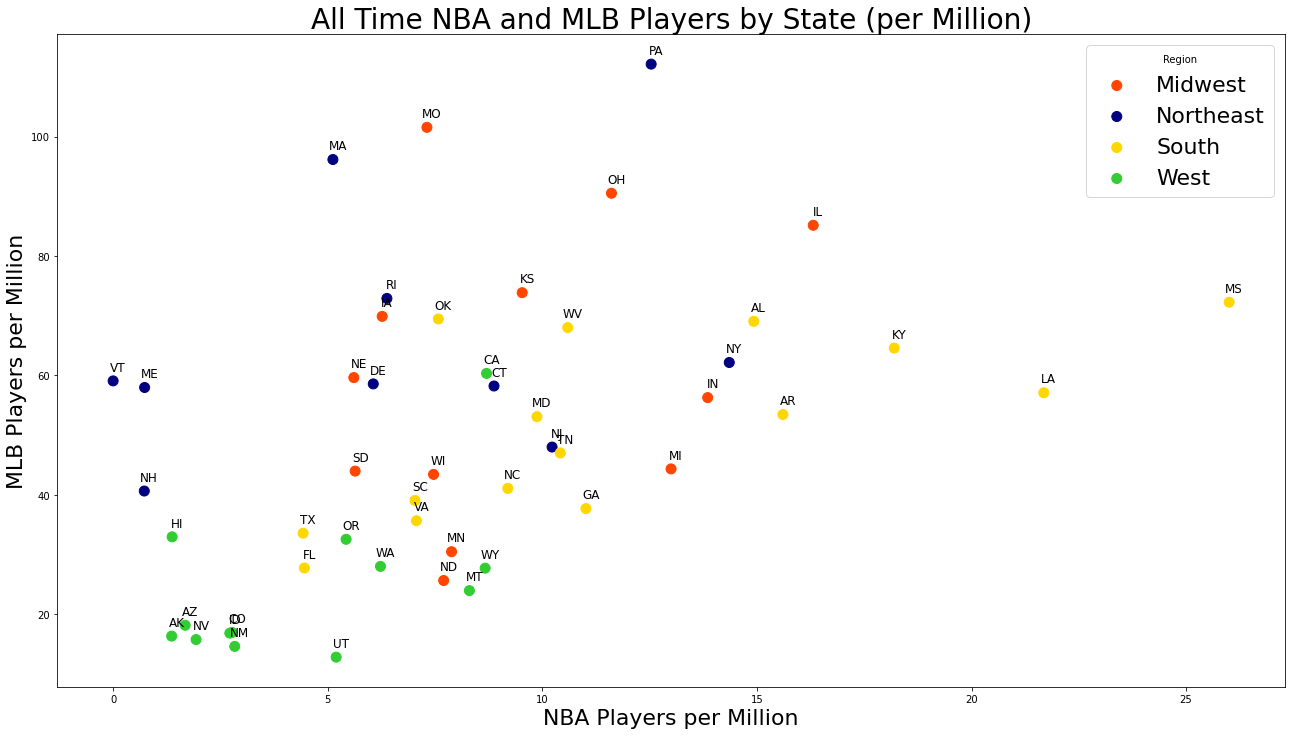

In [11]:
# Scatter Plot
fig = plt.figure(figsize=(22,12))
for g in np.unique(final.Region):
    ix = np.where(final.Region == g)
    plt.scatter(final['NBA'].iloc[ix], final['MLB'].iloc[ix], c=final['color'].iloc[ix], label = g, s = 100)
# Title, axis labels, legend
plt.xlabel('NBA Players per Million', fontsize=22)
plt.ylabel('MLB Players per Million', fontsize=22)
plt.title('All Time NBA and MLB Players by State (per Million)', fontsize=28)
plt.legend(title='Region', fontsize=12, prop={'size': 22})
# Annotate state name to each point
for i, txt in enumerate(final.index):
    plt.annotate(txt, (final['NBA'].iloc[i], final['MLB'].iloc[i]), fontsize=12, textcoords="offset points", xytext=(5,10), ha='center') 

#### With plotly

In [12]:
import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

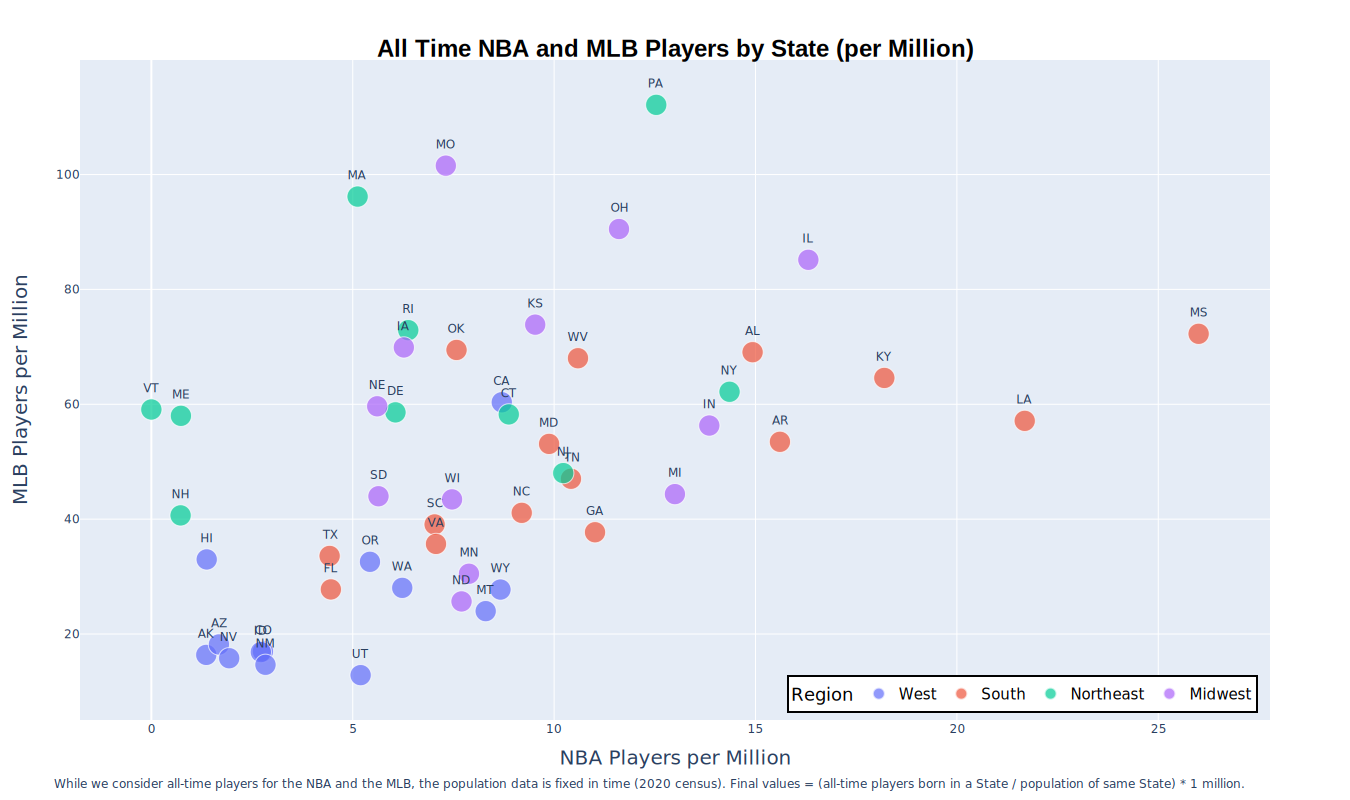

In [13]:
# Create a markersize dummy column to have bigger markers than default
final['markersize'] = 1.
# Scatter Plot
fig = px.scatter(final, x ='NBA', y = 'MLB', color = 'Region', text = 'State_abbr', size='markersize', size_max=15, 
    width=3000, custom_data=['State', 'Region'])
# Update layout 
fig.update_layout(
    title=dict(text='<b>All Time NBA and MLB Players by State (per Million)</b>',x=0.5,y=0.95,font=dict(family="Arial",size=24,color='#000000')), width=1350, height=800, # title customization
    legend=dict(orientation="h", yanchor = "bottom", y = 0.01, xanchor = "right", x = 0.99,font=dict(size=15,color="black"), bordercolor="Black", borderwidth=2)) # legend customization
# Axes update
fig.update_xaxes(title_text="NBA Players per Million", title_font=dict(size=20))
fig.update_yaxes(title_text="MLB Players per Million", title_font=dict(size=20))
# Text and Hover update
fig.update_traces(
    textposition='top center', 
    hovertemplate="<br>".join(["State: <b>%{customdata[0]}</b>", "State_abbr: <b>%{text}</b>","Region: <b>%{customdata[1]}</b>","NBA: <b>%{x}</b>","MLB: <b>%{y}</b>"]))
# Add bottom annotation
fig.add_annotation(dict(font=dict(size=12),x=-0.03,y=-0.11,showarrow=False,text="While we consider all-time players for the NBA and the MLB, the population data is fixed in time (2020 census). Final values = (all-time players born in a State / population of same State) * 1 million.",textangle=0,xanchor='left',xref="paper",yref="paper"))

fig.show(renderer="svg") # substitute with fig.show() for interactive visualization

##### By Regions

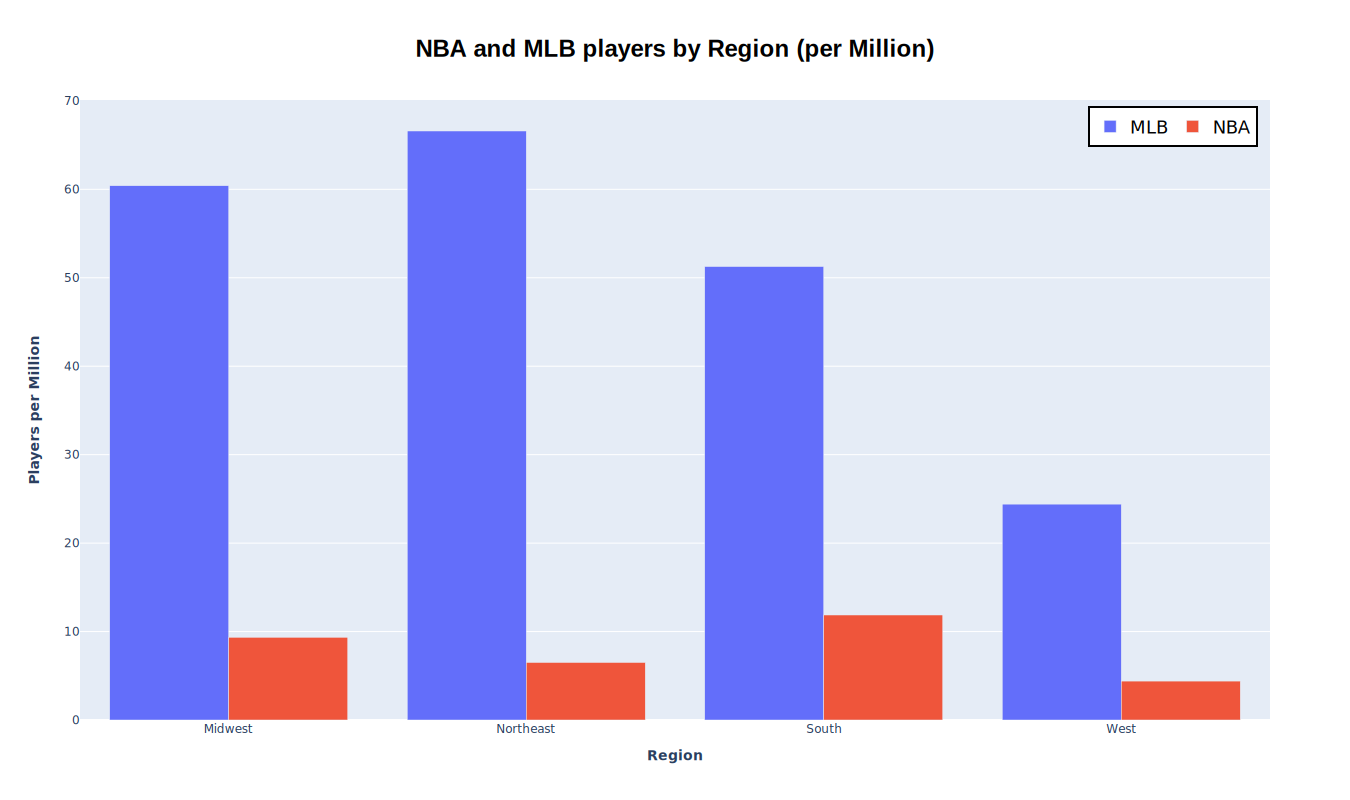

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create average players per region (both NBA and MLB)
reg_nba = final.groupby('Region')['NBA'].mean()
reg_mlb = final.groupby('Region')['MLB'].mean()
# Bar plot
fig = go.Figure([go.Bar(name='MLB', x=reg_mlb.index, y=reg_mlb, offsetgroup='A'), go.Bar(name='NBA', x=reg_nba.index, y=reg_nba, offsetgroup='B')])
# Update layout
fig.update_layout(
    title=dict(text='<b>NBA and MLB players by Region (per Million)</b>',x=0.5,y=0.95,font=dict(family="Arial",size=24,color='#000000')), width=1350, height=800, # title customization
    legend=dict(orientation="h", yanchor = "top", y = 0.99, xanchor = "right", x = 0.99,font=dict(size=18,color="black"), bordercolor="Black", borderwidth=2)) # legend customization
# Update axes
fig.update_yaxes(title_text="<b>Players per Million</b>")
fig.update_xaxes(title_text="<b>Region</b>")

fig.show(renderer="svg") # substitute with fig.show() for interactive visualization

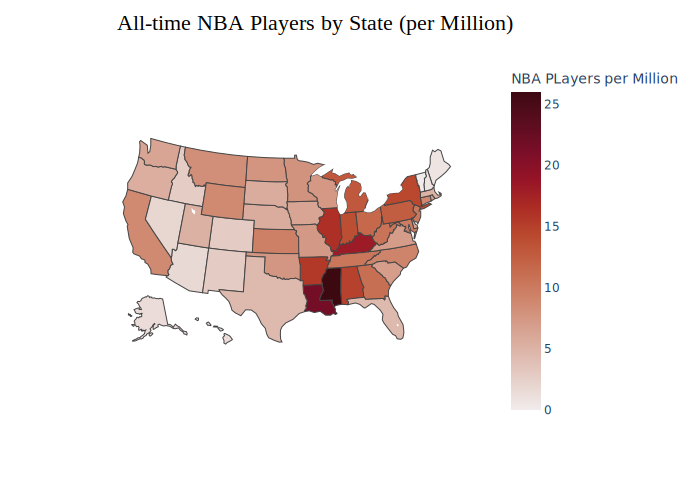

In [15]:
fig = px.choropleth(final,locations='State_abbr', locationmode="USA-states", scope="usa",color='NBA',color_continuous_scale="amp")

fig.update_layout(title_text = 'All-time NBA Players by State (per Million)', title_font_family="Times New Roman", title_font_size = 22,title_font_color="black", title_x=0.45, coloraxis_colorbar=dict(title="NBA PLayers per Million"))        
fig.show(renderer="svg")

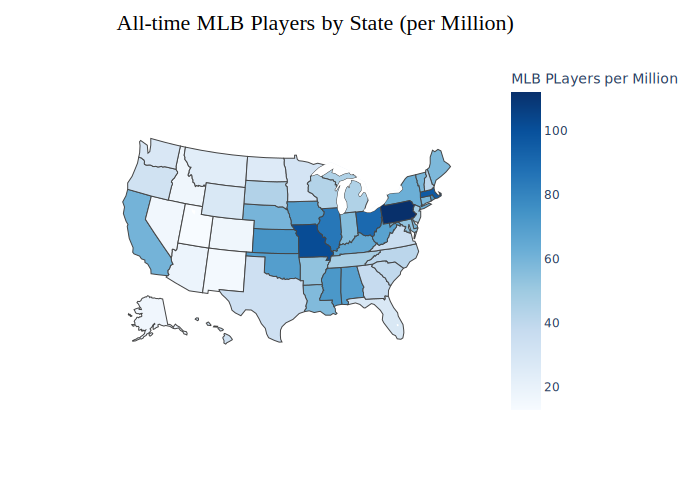

In [16]:
fig = px.choropleth(final,locations='State_abbr', locationmode="USA-states", scope="usa",color='MLB',color_continuous_scale="blues")

fig.update_layout(title_text = 'All-time MLB Players by State (per Million)', title_font_family="Times New Roman", title_font_size = 22,title_font_color="black", title_x=0.45, coloraxis_colorbar=dict(title="MLB PLayers per Million"))        
fig.show(renderer="svg")